In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import quantstats as qs
import matplotlib.pyplot as plt

from data_loading import *

pd.options.mode.copy_on_write = True

In [2]:
raw_df = pd.read_pickle('./data/processed/otc_stocks.pkl')
raw_df

目前狀態  上市別   開盤價(元)   最高價(元)   最低價(元)   收盤價(元)  \
證券代碼    Date                                                            
4102 永日 2001-03-20  Current   OTC   6.0994   6.0994   6.0994   6.0994   
        2001-03-21  Current   OTC   6.5219   6.5219   6.5219   6.5219   
        2001-03-22  Current   OTC   6.9707   6.9707   6.9707   6.9707   
        2001-03-23  Current   OTC   7.4460   7.4460   7.4460   7.4460   
        2001-03-26  Current   OTC   7.9213   7.9213   7.9213   7.9213   
...                      ...  ...      ...      ...      ...      ...   
9962 有益 2025-02-06  Current   OTC  14.5000  14.6000  14.3500  14.6000   
        2025-02-07  Current   OTC  14.6000  14.7500  14.5000  14.6000   
        2025-02-10  Current   OTC  14.7500  16.0500  14.7500  16.0500   
        2025-02-11  Current   OTC  16.2000  16.2500  15.2500  15.3500   
        2025-02-12  Current   OTC  15.3500  15.5000  15.1000  15.1000   

                    成交量(千股)  成交值(千元)    週轉率％  市值(百萬元)  ...  是否可信用交易(Y)  \
證券代碼    Date                                           ...               
4102 永日 2001-03-20      1.0     11.0  0.0030    382.0  ...         NaN   
        2001-03-21      1.0     12.0  0.0030    408.0  ...         NaN   
        2001-03-22      1.0     13.0  0.0030    436.0  ...         NaN   
        2001-03-23      1.0     14.0  0.0030    466.0  ...         NaN   
        2001-03-26      1.0     15.0  0.0030    496.0  ...         NaN   
...                     ...      ...     ...      ...  ...         ...   
9962 有益 2025-02-06     45.0    656.0  0.0499   1317.0  ...           Y   
        2025-02-07     50.0    740.0  0.0554   1317.0  ...           Y   
        2025-02-10   1464.0  23187.0  1.6227   1448.0  ...           Y   
        2025-02-11   1764.0  28001.0  1.9552   1385.0  ...           Y   
        2025-02-12    258.0   3945.0  0.2860   1362.0  ...           Y   

                    借券賣出限額   每股融資成本   每股融券成本  融券最後回補日  融資暫停交易起日  融券暫停交易起日  \
證券代碼    Date                                                                
4102 永日 2001-03-20     NaN      NaN      NaN      NaN       NaN       NaN   
        2001-03-21     NaN      NaN      NaN      NaN       NaN       NaN   
        2001-03-22     NaN      NaN      NaN      NaN       NaN       NaN   
        2001-03-23     NaN      NaN      NaN      NaN       NaN       NaN   
        2001-03-26     NaN      NaN      NaN      NaN       NaN       NaN   
...                    ...      ...      ...      ...       ...       ...   
9962 有益 2025-02-06  9022.0  16.3229  14.5802      NaN       NaN       NaN   
        2025-02-07  9022.0  16.2935      NaN      NaN       NaN       NaN   
        2025-02-10  9022.0  16.2466  15.8303      NaN       NaN       NaN   
        2025-02-11  9022.0  16.1629      NaN      NaN       NaN       NaN   
        2025-02-12  9022.0  16.1427      NaN      NaN       NaN       NaN   

                    資券暫停交易迄日 恢復交易日 暫停交易原因  
證券代碼    Date                               
4102 永日 2001-03-20       NaN   NaN    NaN  
        2001-03-21       NaN   NaN    NaN  
        2001-03-22       NaN   NaN    NaN  
        2001-03-23       NaN   NaN    NaN  
        2001-03-26       NaN   NaN    NaN  
...                      ...   ...    ...  
9962 有益 2025-02-06       NaN   NaN    NaN  
        2025-02-07       NaN   NaN    NaN  
        2025-02-10       NaN   NaN    NaN  
        2025-02-11       NaN   NaN    NaN  
        2025-02-12       NaN   NaN    NaN  

[3158971 rows x 34 columns]

In [3]:
df = raw_df[['收盤價(元)']]
df.index.rename(['證券代碼', 'Date'], inplace=True)
df.rename(columns={'收盤價(元)': 'Close'}, inplace=True)
df

Close
證券代碼    Date               
4102 永日 2001-03-20   6.0994
        2001-03-21   6.5219
        2001-03-22   6.9707
        2001-03-23   7.4460
        2001-03-26   7.9213
...                     ...
9962 有益 2025-02-06  14.6000
        2025-02-07  14.6000
        2025-02-10  16.0500
        2025-02-11  15.3500
        2025-02-12  15.1000

[3158971 rows x 1 columns]

In [4]:
df[df.isna().any(axis=1)]
df.dropna(inplace=True)
df[df.isna().any(axis=1)]

,,Close
證券代碼,Date,


In [5]:
otc = pd.read_pickle('./data/processed/otc_index.pkl')

otc = otc[['收盤價(元)']]
otc.rename(columns={'收盤價(元)': 'Close'}, inplace=True)
otc

Close
證券代碼         Date              
OTC99 OTC 指數 2000-02-14  277.83
             2000-02-15  271.23
             2000-02-16  276.50
             2000-02-17  280.59
             2000-02-18  280.73
...                         ...
             2025-02-06  252.48
             2025-02-07  255.54
             2025-02-10  253.57
             2025-02-11  254.01
             2025-02-12  253.12

[6182 rows x 1 columns]

In [ ]:
otc[otc.isna().any(axis=1)]
otc.dropna(inplace=True)
otc[otc.isna().any(axis=1)]

,,Close
證券代碼,Date,


In [6]:
df = pd.concat([df, otc])
df = df[df.index.get_level_values(1) >= '2012-01-01']

In [7]:
# Apply the function to each group
df['YSTD Close'] = df.groupby('證券代碼')['Close'].shift(1)
df['logRet_1d'] = (df['Close'] / df['YSTD Close']).apply(np.log)
df['logRet_3d'] = df.groupby('證券代碼')['logRet_1d'].rolling(3).sum().reset_index(0,drop=True)
df['vol_120d'] = df.groupby('證券代碼')['logRet_1d'].rolling(120).std().reset_index(0,drop=True)

In [55]:
#df[df.index.get_level_values(level=0) == 'TWII'][df['logRet_3d'].isnull()]

In [8]:
# calculate 750-day rolling correlation

unstacked = df['logRet_3d'].unstack(0)
unstacked = unstacked[~unstacked['OTC99 OTC 指數'].isnull()]

corr = unstacked.rolling(750).corr(unstacked['OTC99 OTC 指數'])

df['corr_750d'] = corr.stack().reorder_levels([1, 0]).sort_index()

In [9]:
df[df['corr_750d'].isnull()]

Close  YSTD Close  logRet_1d  logRet_3d  vol_120d  \
證券代碼         Date                                                               
1259 安心      2012-01-02   89.6747         NaN        NaN        NaN       NaN   
             2012-01-03   89.6747     89.6747   0.000000        NaN       NaN   
             2012-01-04   88.5177     89.6747  -0.012986        NaN       NaN   
             2012-01-05   87.9391     88.5177  -0.006558  -0.019544       NaN   
             2012-01-06   87.9391     87.9391   0.000000  -0.019544       NaN   
...                           ...         ...        ...        ...       ...   
OTC99 OTC 指數 2015-01-08  138.7300    138.2400   0.003538  -0.013816  0.010613   
             2015-01-09  138.9800    138.7300   0.001800   0.005122  0.010603   
             2015-01-12  138.3000    138.9800  -0.004905   0.000434  0.010606   
             2015-01-13  138.7600    138.3000   0.003321   0.000216  0.010595   
             2015-01-14  139.3300    138.7600   0.004099   0.002515  0.010564   

                         corr_750d  
證券代碼         Date                   
1259 安心      2012-01-02        NaN  
             2012-01-03        NaN  
             2012-01-04        NaN  
             2012-01-05        NaN  
             2012-01-06        NaN  
...                            ...  
OTC99 OTC 指數 2015-01-08        NaN  
             2015-01-09        NaN  
             2015-01-12        NaN  
             2015-01-13        NaN  
             2015-01-14        NaN  

[625591 rows x 6 columns]

In [10]:
beta =  df[df.index.get_level_values('證券代碼') == '1101 台泥']['corr_750d']
beta.fillna(0)[beta.fillna(0) != 0]

Series([], Name: corr_750d, dtype: float64)

In [11]:
# calculate beta

vol_unstacked = df['vol_120d'].unstack('證券代碼')
beta = vol_unstacked.div(vol_unstacked['OTC99 OTC 指數'], axis=0) * corr
df['beta'] = beta.stack().reorder_levels([1, 0]).sort_index()
df['beta_lag1'] = df.groupby('證券代碼')['beta'].shift(1)
df['beta_lag2'] = df.groupby('證券代碼')['beta'].shift(2)

In [36]:
# function for sorting quantiles

def test_factor_performance(df, q = 10, factor = 'beta_last_month', returns = 'logRet_1d', reverse = False):

    df['Rank'] = df.groupby('Date')[factor].rank(ascending=reverse, method='first')
    df['Quantile'] = df.groupby('Date')['Rank'].transform(
        lambda x: pd.qcut(x, q, labels=[i for i in range(1, q+1)])
    )

    # Calculate average return for each quantile on each date
    quantile_returns = df.groupby(['Date', 'Quantile'])[returns].mean().unstack()
    #quantile_returns['avg'] = df.groupby('Date')[returns].mean()
    #quantile_returns['long-short'] = quantile_returns[1] - quantile_returns[q]
    #plt.title('Daily Beta Performance')
    quantile_returns.cumsum().plot()

    df['Weight'] = 1 / df.groupby(['Date', 'Quantile']).transform('size')

    position = pd.DataFrame()

    for i in range(1, q+1):
        position[i] = df['Weight'].where(df['Quantile'] == i, other=0)
    
    qs.reports.metrics(quantile_returns)
    return quantile_returns, position

In [37]:
# quantile with daily rebalance

stocks = df[df.index.get_level_values('證券代碼') != 'OTC99 OTC 指數'].dropna(how='any')
stocks

Close  YSTD Close  logRet_1d     logRet_3d  vol_120d  \
證券代碼    Date                                                                 
1259 安心 2015-01-19  49.7941     49.3127   0.009715  4.151667e-03  0.009926   
        2015-01-20  50.0692     49.7941   0.005510  8.673617e-18  0.009936   
        2015-01-21  50.1380     50.0692   0.001373  1.659755e-02  0.009936   
        2015-01-22  50.0692     50.1380  -0.001373  5.509545e-03  0.009936   
        2015-01-23  50.2068     50.0692   0.002744  2.744427e-03  0.009933   
...                     ...         ...        ...           ...       ...   
9962 有益 2025-02-06  14.6000     14.6000   0.000000  3.130690e-02  0.011580   
        2025-02-07  14.6000     14.6000   0.000000  2.777956e-02  0.011542   
        2025-02-10  16.0500     14.6000   0.094687  9.468732e-02  0.014044   
        2025-02-11  15.3500     16.0500  -0.044593  5.009395e-02  0.014629   
        2025-02-12  15.1000     15.3500  -0.016421  3.367322e-02  0.014702   

                    corr_750d      beta  beta_lag1  beta_lag2  
證券代碼    Date                                                   
1259 安心 2015-01-19   0.404137  0.383965   0.382293   0.377250  
        2015-01-20   0.403970  0.381335   0.383965   0.382293  
        2015-01-21   0.404852  0.382796   0.381335   0.383965  
        2015-01-22   0.405269  0.383514   0.382796   0.381335  
        2015-01-23   0.405439  0.384801   0.383514   0.382796  
...                       ...       ...        ...        ...  
9962 有益 2025-02-06   0.515457  0.522566   0.511897   0.492962  
        2025-02-07   0.516781  0.521365   0.522566   0.511897  
        2025-02-10   0.516566  0.691826   0.521365   0.522566  
        2025-02-11   0.516088  0.720511   0.691826   0.521365  
        2025-02-12   0.515907  0.737451   0.720511   0.691826  

[1569053 rows x 9 columns]

/var/folders/q_/2nhldr_d2x723c91y7qt5g2r0000gn/T/ipykernel_40290/2619834189.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantile_returns = df.groupby(['Date', 'Quantile'])[returns].mean().unstack()
/var/folders/q_/2nhldr_d2x723c91y7qt5g2r0000gn/T/ipykernel_40290/2619834189.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Weight'] = 1 / df.groupby(['Date', 'Quantile']).transform('size')
/Users/stuartlu/anaconda3/envs/ml-taiwan-stockpicks/lib/python3.12/site-packages/quantstats/stats.py:510: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ret

                    1           2           3           4           5           6           7           8           9           10
------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start Period        2015-01-19  2015-01-19  2015-01-19  2015-01-19  2015-01-19  2015-01-19  2015-01-19  2015-01-19  2015-01-19  2015-01-19
End Period          2025-02-12  2025-02-12  2025-02-12  2025-02-12  2025-02-12  2025-02-12  2025-02-12  2025-02-12  2025-02-12  2025-02-12
Risk-Free Rate      0.0%        0.0%        0.0%        0.0%        0.0%        0.0%        0.0%        0.0%        0.0%        0.0%
Time in Market      100.0%      100.0%      100.0%      100.0%      100.0%      100.0%      100.0%      100.0%      100.0%      100.0%

Cumulative Return   88.43%      93.73%      98.8%       165.16%     125.78%     115.55%     105.76%     -0.86%      18.11%      -9.73%
CAGR﹪              4.44%       4.64%       4.82%

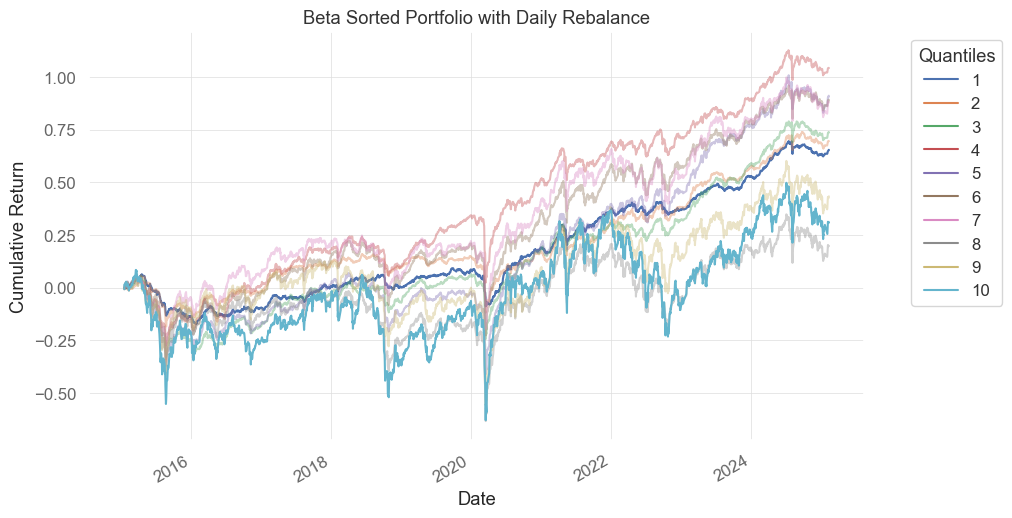

In [38]:
returns_daily_rebalanced, position = test_factor_performance(stocks, factor = 'beta_lag1', returns = 'logRet_1d', reverse = True)


#returns_daily_rebalanced.cumsum().plot(figsize=(12, 6))
plt.title('Beta Sorted Portfolio with Daily Rebalance')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend(title='Quantiles', bbox_to_anchor=(1.05, 1), loc='upper left')

# Make other quantiles transparent and highlight 1st and 10th quantiles
for i in range(1, 9):
    plt.gca().get_lines()[i].set_alpha(0.4)

In [39]:
returns_daily_rebalanced

Quantile,1,2,3,4,5,6,7,8,9,10
Date,,,,,,,,,,
2015-01-19,0.000153,-0.000162,-0.004170,-0.004075,-0.003498,-0.005112,-0.001830,-0.008837,-0.003637,-0.006259
2015-01-20,-0.000548,0.002001,0.003476,0.003304,0.007260,0.007222,0.009319,0.012873,0.014925,0.020941
2015-01-21,-0.002632,0.000679,-0.001744,-0.004639,0.003189,-0.000416,-0.001857,-0.000710,0.000609,-0.001653
2015-01-22,0.001032,0.003590,0.005024,0.006235,0.008955,0.007973,0.008071,0.010548,0.005748,0.006792
2015-01-23,0.000167,0.001943,-0.001070,0.003237,0.004357,0.007229,0.004385,0.002657,-0.000838,-0.000322
...,...,...,...,...,...,...,...,...,...,...
2025-02-06,0.006013,0.008379,0.006987,0.007189,0.010582,0.007200,0.015075,0.012871,0.012452,0.014753
2025-02-07,0.001648,0.000482,0.007237,0.004394,0.008356,0.006286,0.014855,0.014409,0.012594,0.017488
2025-02-10,0.002540,0.002365,0.004941,0.001678,0.004490,-0.004921,-0.003058,-0.004779,-0.005820,-0.005839


/var/folders/q_/2nhldr_d2x723c91y7qt5g2r0000gn/T/ipykernel_40290/2619834189.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantile_returns = df.groupby(['Date', 'Quantile'])[returns].mean().unstack()
/var/folders/q_/2nhldr_d2x723c91y7qt5g2r0000gn/T/ipykernel_40290/2619834189.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Weight'] = 1 / df.groupby(['Date', 'Quantile']).transform('size')
/Users/stuartlu/anaconda3/envs/ml-taiwan-stockpicks/lib/python3.12/site-packages/quantstats/stats.py:510: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ret

                    1           2           3           4           5           6           7           8           9           10
------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start Period        2015-02-02  2015-02-02  2015-02-02  2015-02-02  2015-02-02  2015-02-02  2015-02-02  2015-02-02  2015-02-02  2015-02-02
End Period          2025-02-12  2025-02-12  2025-02-12  2025-02-12  2025-02-12  2025-02-12  2025-02-12  2025-02-12  2025-02-12  2025-02-12
Risk-Free Rate      0.0%        0.0%        0.0%        0.0%        0.0%        0.0%        0.0%        0.0%        0.0%        0.0%
Time in Market      100.0%      100.0%      100.0%      100.0%      100.0%      100.0%      100.0%      100.0%      100.0%      100.0%

Cumulative Return   114.07%     108.79%     144.72%     140.16%     139.35%     97.69%      71.15%      29.48%      -11.16%     -25.84%
CAGR﹪              5.38%       5.19%       6.35

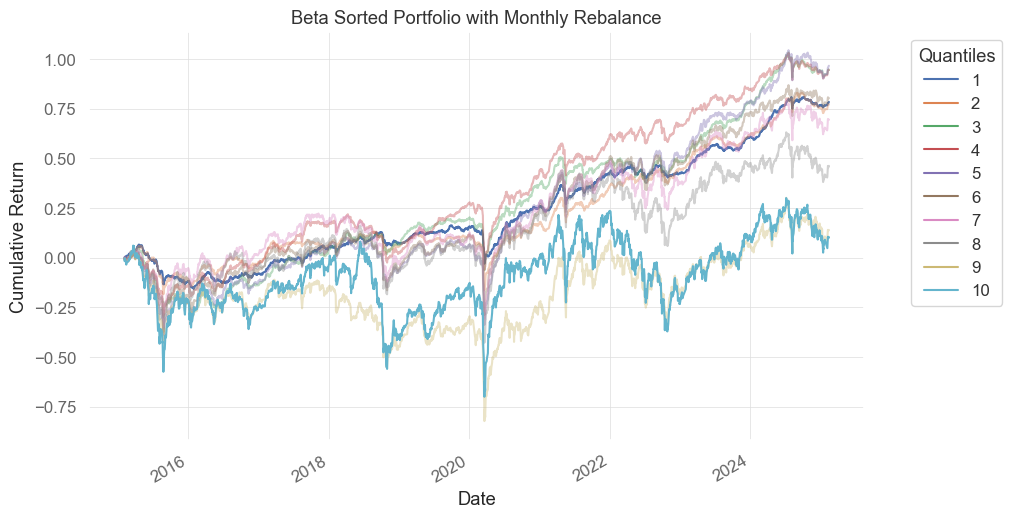

In [40]:
# test monthly quantile returns

stocks = df[df.index.get_level_values('證券代碼') != 'Y9999 加權指數'].dropna(how='any')

stocks['Month'] = stocks.index.get_level_values('Date').to_period('M')
stocks_monthly = stocks.groupby(['證券代碼', 'Month']).last()
stocks_monthly['beta_last_month'] = stocks_monthly.groupby('證券代碼')['beta'].shift(1)
stocks = stocks.merge(stocks_monthly[['beta_last_month']], left_on=['證券代碼', 'Month'], right_index=True).dropna(how='any')

quantile_returns, positions = test_factor_performance(stocks, factor = 'beta_last_month', returns = 'logRet_1d', reverse = True)

#returns_daily_rebalanced.cumsum().plot(figsize=(12, 6))
plt.title('Beta Sorted Portfolio with Monthly Rebalance')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend(title='Quantiles', bbox_to_anchor=(1.05, 1), loc='upper left')

# Make other quantiles transparent and highlight 1st and 10th quantiles
for i in range(1, 9):
    plt.gca().get_lines()[i].set_alpha(0.4)

In [41]:
# view positions for each quantile

def show_position_at_given_time(position, quantile, date):
    pos = positions[positions.index.get_level_values('Date') == date][positions[quantile] > 0][quantile].index.get_level_values('證券代碼')
    print(f'Quantile {quantile} size: {len(pos)}')
    return pos
    
show_position_at_given_time(positions, 9, '2023-01-5')

Quantile 9 size: 69


/var/folders/q_/2nhldr_d2x723c91y7qt5g2r0000gn/T/ipykernel_40290/3498278321.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pos = positions[positions.index.get_level_values('Date') == date][positions[quantile] > 0][quantile].index.get_level_values('證券代碼')


Index(['1336 台翰', '1785 光洋科', '2230 泰茂', '2732 六角', '2736 富野', '2745 五福',
       '3152 璟德', '3221 台嘉碩', '3264 欣銓', '3265 台星科', '3268 海德威', '3324 雙鴻',
       '3390 旭軟', '3483 力致', '3511 矽瑪', '3552 同致', '3580 友威科', '3594 磐儀',
       '3625 西勝', '3675 德微', '3687 歐買尬', '3693 營邦', '4114 健喬', '4116 明基醫',
       '4147 中裕', '4167 松瑞藥', '4168 醣聯', '4402 郡都開發', '4721 美琪瑪', '5211 蒙恬',
       '5245 智晶', '5344 立衛', '5347 世界', '5353 台林', '5371 中光電', '5386 青雲',
       '5483 中美晶', '6109 亞元', '6111 大宇資', '6113 亞矽', '6129 普誠', '6134 萬旭',
       '6156 松上', '6160 欣技', '6175 立敦', '6182 合晶', '6223 旺矽', '6231 系微',
       '6265 方土昶', '6274 台燿', '6279 胡連', '6284 佳邦', '6411 晶焱', '6432 今展科',
       '6435 大中', '6461 益得', '6470 宇智', '6494 九齊', '6510 精測', '8024 佑華',
       '8050 廣積', '8054 安國', '8091 翔名', '8093 保銳', '8183 精星', '8299 群聯',
       '8349 恒耀', '8436 大江', '8933 愛地雅'],
      dtype='object', name='證券代碼')

/Users/stuartlu/anaconda3/envs/ml-taiwan-stockpicks/lib/python3.12/site-packages/quantstats/stats.py:510: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  returns = _utils._prepare_returns(returns, rf).resample(resolution).sum()


                    high        low         bab
------------------  ----------  ----------  ----------
Start Period        2015-01-19  2015-01-19  2015-01-19
End Period          2025-02-12  2025-02-12  2025-02-12
Risk-Free Rate      0.0%        0.0%        0.0%
Time in Market      100.0%      100.0%      100.0%

Cumulative Return   31.29%      1,509.82%   1,445.33%
CAGR﹪              1.88%       20.98%      20.64%

Sharpe              0.25        0.9         1.28
Prob. Sharpe Ratio  77.64%      99.36%      99.95%
Sortino             0.31        1.09        1.63
Sortino/√2          0.22        0.77        1.15
Omega               1.05        1.05        1.05

Max Drawdown        -60.22%     -84.68%     -64.02%
Longest DD Days     1935        1062        1030

Gain/Pain Ratio     0.05        0.21        0.3
Gain/Pain (1M)      0.2         0.71        0.94

Payoff Ratio        0.56        0.63        0.74
Profit Factor       1.05        1.21        1.3
Common Sense Ratio  0.82        1.05

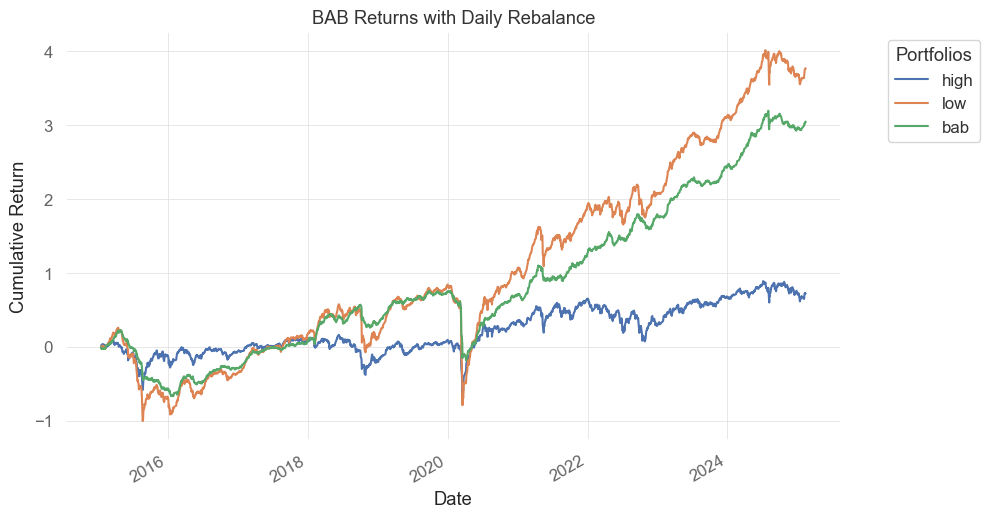

In [42]:
# now we calculate the BAB factor

stocks = df[df.index.get_level_values('證券代碼') != 'TWII'].dropna(how='any')
stocks['Month'] = stocks.index.get_level_values('Date').to_period('M')

stocks['beta_shrinked'] = stocks['beta'] * 0.6
stocks['beta_rank'] = stocks.groupby('Date')['beta_shrinked'].rank(ascending=True)

# assign high/low beta groups
stocks['beta_rank_avg'] = stocks.groupby('Date')['beta_rank'].transform('mean')

stocks['beta_rank_dev'] = stocks['beta_rank'] - stocks['beta_rank_avg']
stocks['beta_rank_abs_dev'] = stocks['beta_rank_dev'].abs()
stocks['k'] = 2 / stocks.groupby('Date')['beta_rank_abs_dev'].transform('sum')
stocks['w_h'] = np.maximum(stocks['beta_rank_dev'], 0) * stocks['k']
stocks['w_l'] = -np.minimum(stocks['beta_rank_dev'], 0) * stocks['k']
stocks['ret_h'] = stocks['w_h'].shift(1) * stocks['logRet_1d']
stocks['ret_l'] = stocks['w_l'].shift(1) * stocks['logRet_1d']
stocks['beta_h'] = stocks['w_h'].shift(1) * stocks['beta_shrinked'].shift(1)
stocks['beta_l'] = stocks['w_l'].shift(1) * stocks['beta_shrinked'].shift(1)

bab_return = pd.DataFrame()
bab_return['high'] = stocks.groupby('Date')['ret_h'].sum() / stocks.groupby('Date')['beta_h'].sum()
bab_return['low'] = stocks.groupby('Date')['ret_l'].sum() / stocks.groupby('Date')['beta_l'].sum()
bab_return['bab'] = bab_return['low'] - bab_return['high']

bab_return
bab_return.cumsum().plot()

qs.reports.metrics(bab_return)

plt.title('BAB Returns with Daily Rebalance')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend(title='Portfolios', bbox_to_anchor=(1.05, 1), loc='upper left')

In [43]:
# rebalance monthly

stocks_monthly = stocks.groupby(['證券代碼', 'Month']).last()
stocks_monthly['w_h_m'] = stocks_monthly['w_h'].shift(1)
stocks_monthly['w_l_m'] = stocks_monthly['w_l'].shift(1)
stocks_monthly['beta_h_m'] = stocks_monthly['w_h_m'] * stocks_monthly['beta_shrinked'].shift(1)
stocks_monthly['beta_l_m'] = stocks_monthly['w_l_m'] * stocks_monthly['beta_shrinked'].shift(1)

stocks = stocks.merge(stocks_monthly[['w_h_m', 'w_l_m', 'beta_h_m', 'beta_l_m']], left_on=['證券代碼', 'Month'], right_index=True)

stocks['ret_h_m'] = stocks['w_h_m'] * stocks['logRet_1d']
stocks['ret_l_m'] = stocks['w_l_m'] * stocks['logRet_1d']

/Users/stuartlu/anaconda3/envs/ml-taiwan-stockpicks/lib/python3.12/site-packages/quantstats/stats.py:510: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  returns = _utils._prepare_returns(returns, rf).resample(resolution).sum()


                    high        low         bab
------------------  ----------  ----------  ----------
Start Period        2015-01-19  2015-01-19  2015-01-19
End Period          2025-02-12  2025-02-12  2025-02-12
Risk-Free Rate      0.0%        0.0%        0.0%
Time in Market      100.0%      100.0%      100.0%

Cumulative Return   10.42%      2,342.76%   2,810.83%
CAGR﹪              0.68%       24.49%      25.99%

Sharpe              0.18        0.99        1.49
Prob. Sharpe Ratio  71.53%      99.65%      99.98%
Sortino             0.23        1.2         1.89
Sortino/√2          0.16        0.85        1.33
Omega               1.03        1.03        1.03

Max Drawdown        -60.96%     -86.05%     -67.68%
Longest DD Days     2182        1062        1016

Gain/Pain Ratio     0.03        0.24        0.37
Gain/Pain (1M)      0.14        0.84        1.32

Payoff Ratio        0.56        0.63        0.73
Profit Factor       1.03        1.24        1.37
Common Sense Ratio  0.79        1.

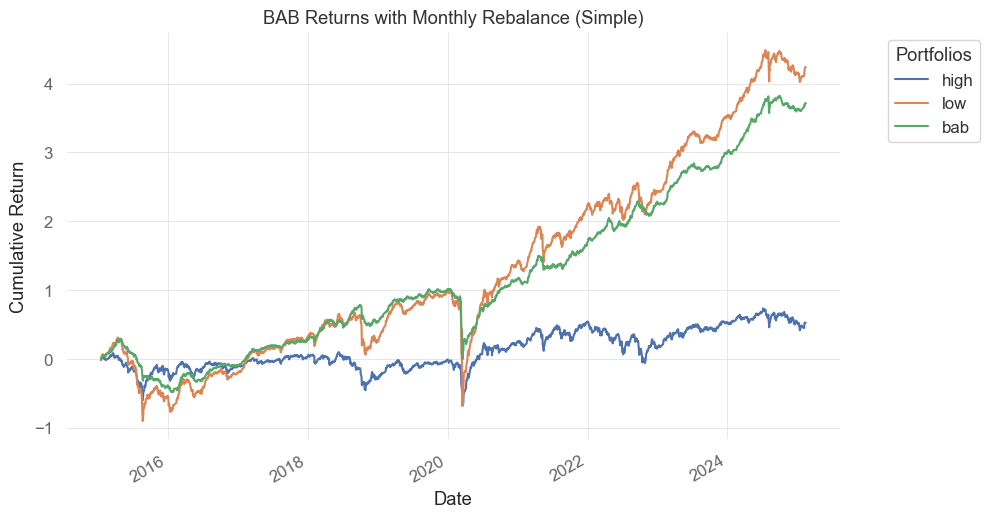

In [44]:
bab_return = pd.DataFrame()
bab_return['high'] = stocks.groupby('Date')['ret_h_m'].sum() / stocks.groupby('Date')['beta_h_m'].sum()
bab_return['low'] = stocks.groupby('Date')['ret_l_m'].sum() / stocks.groupby('Date')['beta_l_m'].sum()
bab_return['bab'] = bab_return['low'] - bab_return['high']

bab_return.cumsum().plot()

plt.title('BAB Returns with Monthly Rebalance (Simple)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend(title='Portfolios', bbox_to_anchor=(1.05, 1), loc='upper left')

qs.reports.metrics(bab_return)

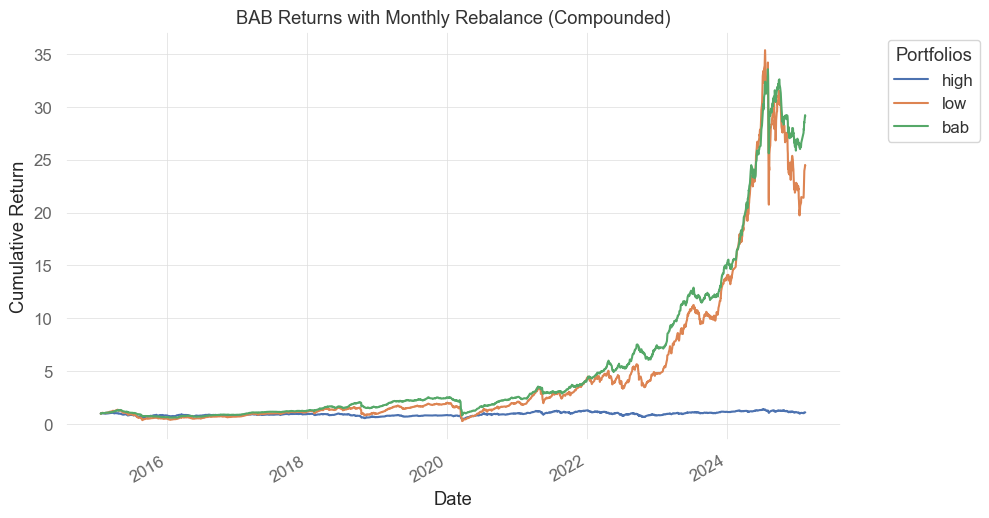

In [45]:
(bab_return + 1).cumprod().plot()

plt.title('BAB Returns with Monthly Rebalance (Compounded)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend(title='Portfolios', bbox_to_anchor=(1.05, 1), loc='upper left')